# Decision Tree - Multicalss Classification

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [77]:
iris = datasets.load_iris()

In [78]:
# Feature class
x = iris.data

# Class Labels
y = iris.target

In [79]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [81]:
from sklearn.tree import DecisionTreeClassifier
mod = DecisionTreeClassifier(criterion='entropy',random_state=0)
mod.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [82]:
# Prediction
y_pred = mod.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [83]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [84]:
print(classification_report(y_test,y_pred))
print('-'*80)
print(confusion_matrix(y_test,y_pred))
print('-'*80)

print(accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

--------------------------------------------------------------------------------
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
--------------------------------------------------------------------------------
0.9736842105263158


In [85]:
from sklearn import tree
text = tree.export_text(mod)
print(text)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: 2



In [86]:
graph = tree.export_graphviz(mod)

In [87]:
graph

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[3] <= 0.8\\nentropy = 1.581\\nsamples = 112\\nvalue = [37, 34, 41]"] ;\n1 [label="entropy = 0.0\\nsamples = 37\\nvalue = [37, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="x[2] <= 4.95\\nentropy = 0.994\\nsamples = 75\\nvalue = [0, 34, 41]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="x[3] <= 1.65\\nentropy = 0.414\\nsamples = 36\\nvalue = [0, 33, 3]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 32\\nvalue = [0, 32, 0]"] ;\n3 -> 4 ;\n5 [label="x[1] <= 3.1\\nentropy = 0.811\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n3 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 3\\nvalue = [0, 0, 3]"] ;\n5 -> 6 ;\n7 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1, 0]"] ;\n5 -> 7 ;\n8 [label="x[3] <= 1.75\\nentropy = 0.172\\nsamples = 39\\nvalue = [0, 1, 38]"] ;\n2 -> 8 ;\n9 [label="x[3] <= 1.65\\nentropy = 0.811\\nsamples = 4\\

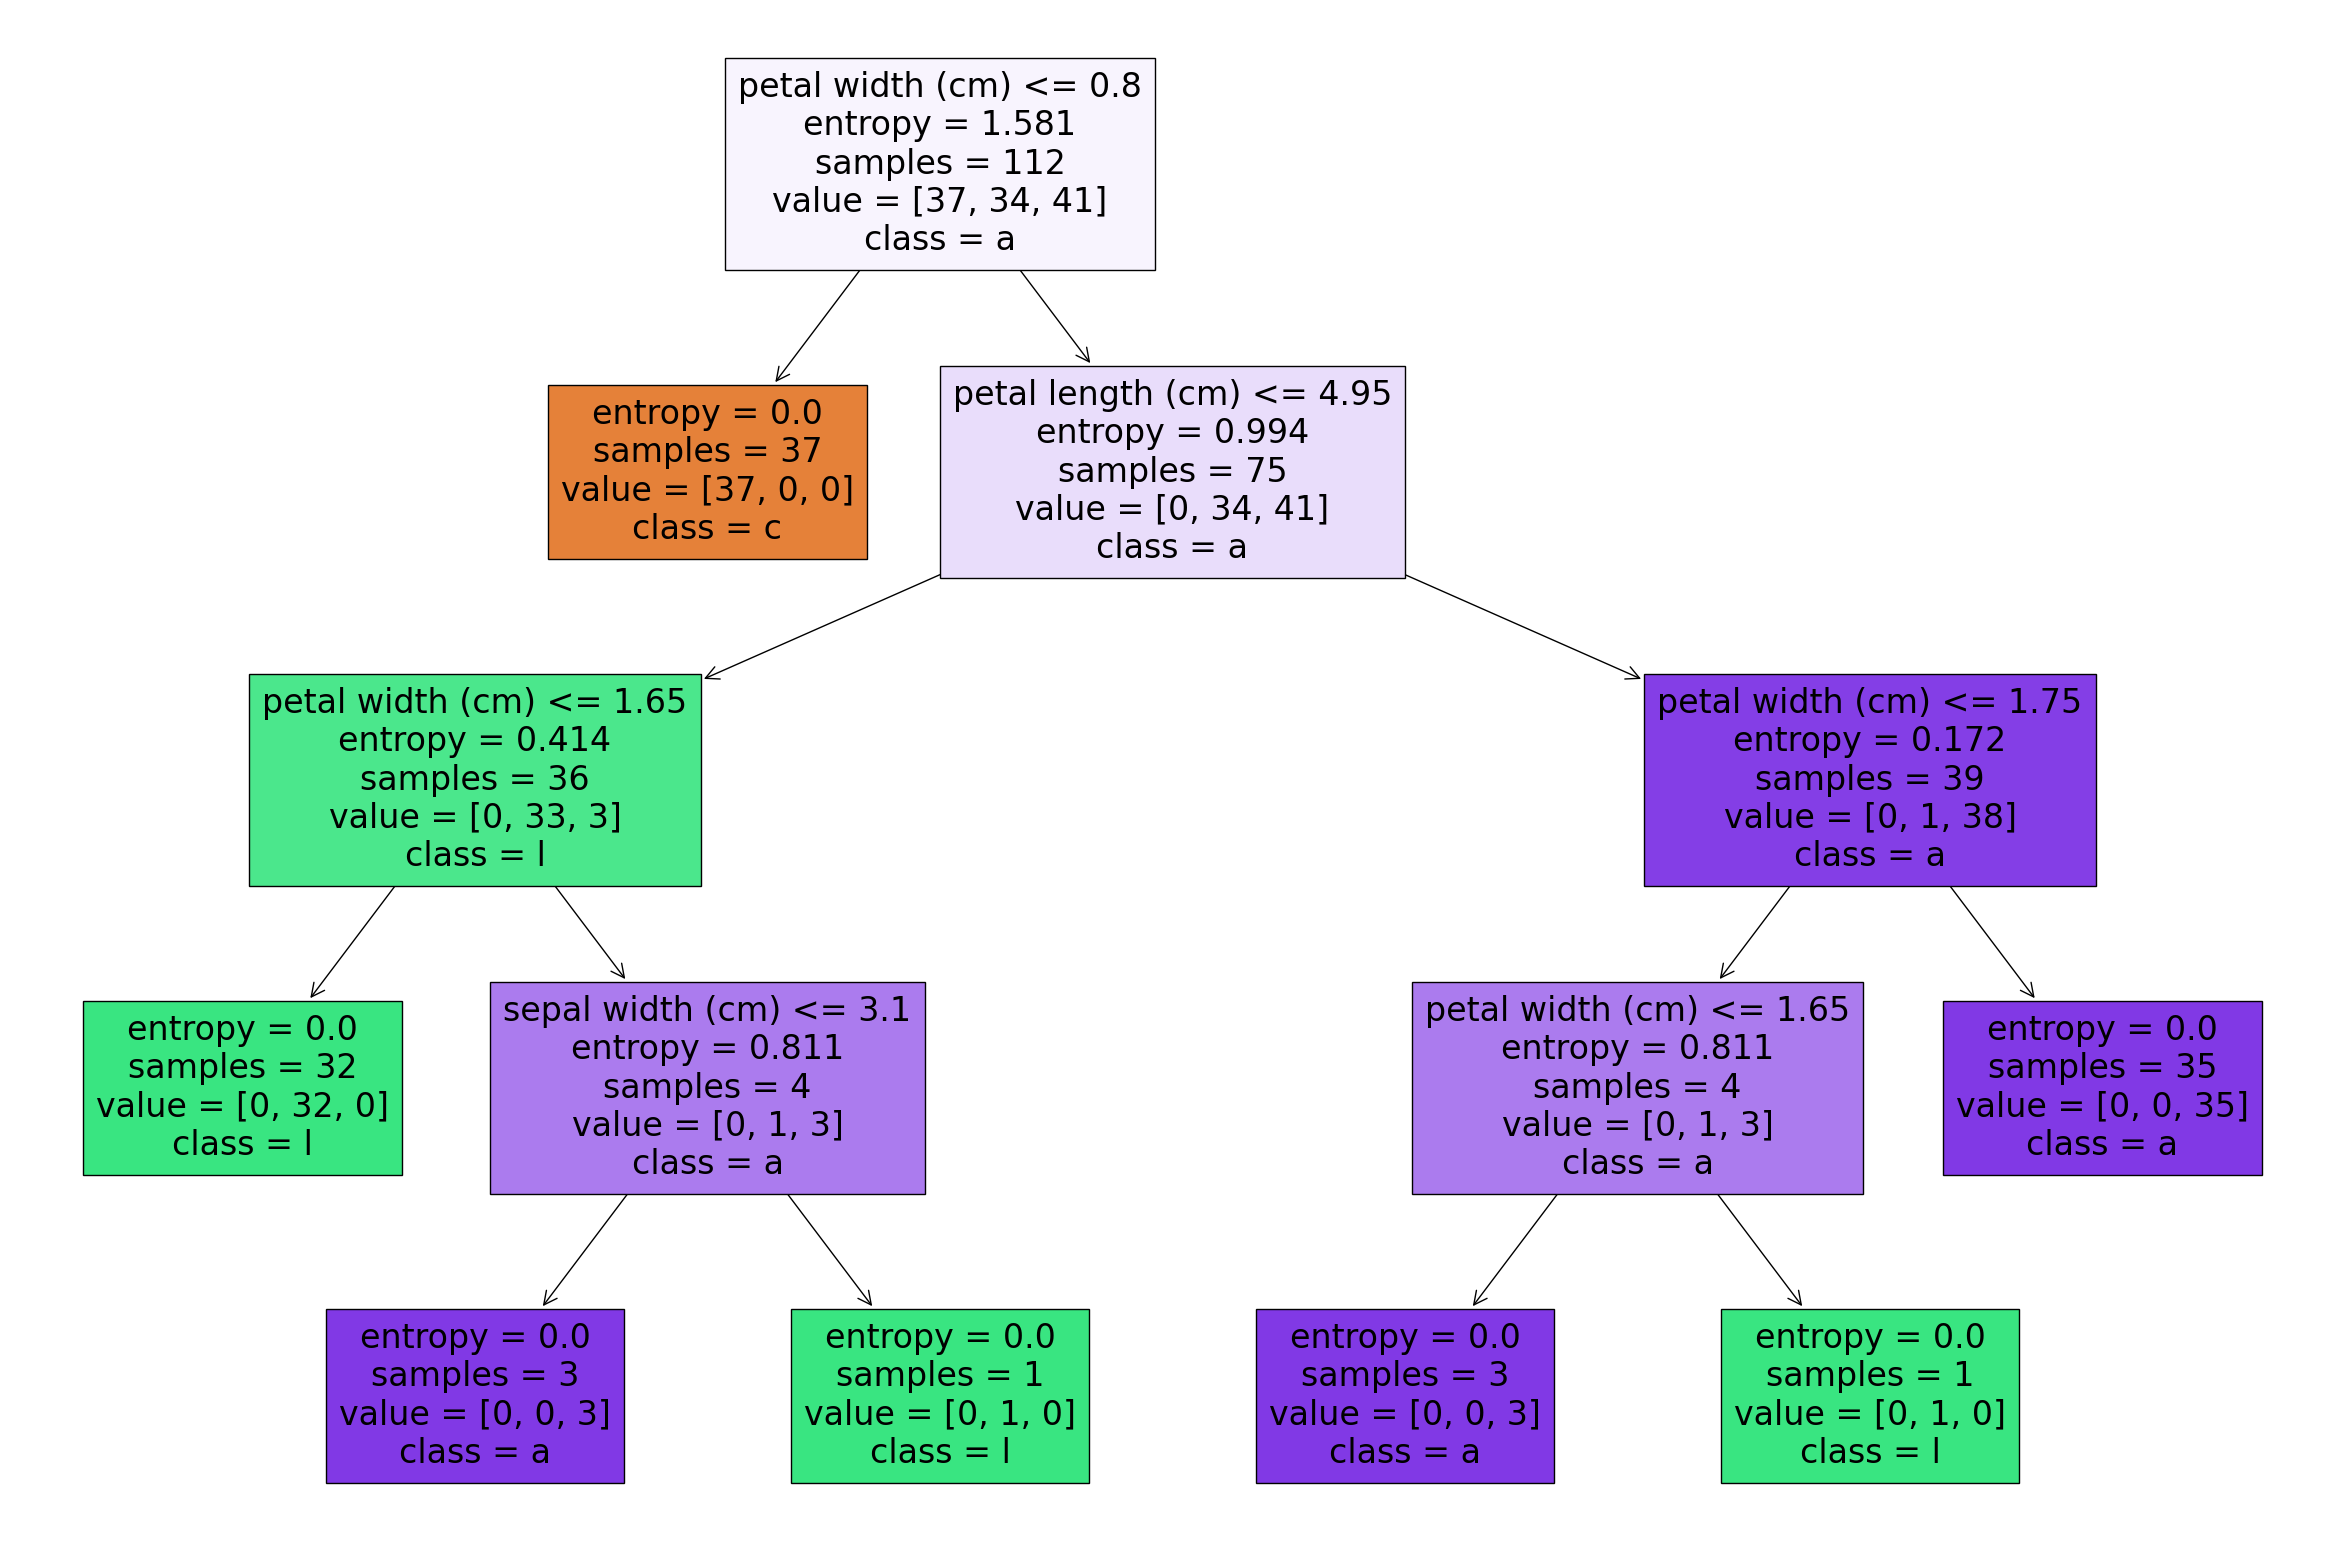

In [88]:
plt.figure(figsize=(30,20))
_ = tree.plot_tree(mod,feature_names = iris.feature_names,class_names=['c','l','a'] ,filled = True)

-------------------------

# Decision Tree Regressor

In [89]:
data = pd.read_csv('D7data1.csv')

In [90]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [91]:
# Features 
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [92]:
# Splitting Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [93]:
# Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train = ss.fit_transform(x_train)

x_test = ss.fit_transform(x_test)

In [94]:
from sklearn.tree import DecisionTreeRegressor
mod = DecisionTreeRegressor(max_depth=3,random_state=0)
mod.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [95]:
#Predict

y_pred = mod.predict(x_test)
y_pred

array([24.74137931, 20.84351852, 20.84351852, 11.88135593, 20.84351852,
       24.74137931, 20.84351852, 20.84351852, 20.84351852, 20.84351852,
       11.88135593, 11.88135593, 16.5796875 , 11.88135593, 46.24761905,
       32.27962963, 20.84351852, 32.27962963, 24.74137931, 20.84351852,
       24.74137931, 20.84351852, 20.84351852, 24.74137931, 20.84351852,
       20.84351852, 20.84351852, 16.5796875 , 46.24761905, 16.5796875 ,
       11.88135593, 20.84351852, 20.84351852, 20.84351852, 20.84351852,
       20.84351852, 11.88135593, 20.84351852, 11.88135593, 16.5796875 ,
       24.74137931, 20.84351852, 20.84351852, 11.88135593, 24.74137931,
       20.84351852, 16.5796875 , 20.84351852, 16.5796875 , 26.85384615,
       20.84351852, 16.5796875 , 20.84351852, 28.55      , 16.5796875 ,
       16.5796875 , 20.84351852, 20.84351852, 20.84351852, 16.5796875 ,
       24.74137931, 20.84351852, 32.27962963, 24.74137931, 20.84351852,
       24.74137931, 16.5796875 , 16.5796875 , 11.88135593, 20.84

In [96]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.6181603859101792


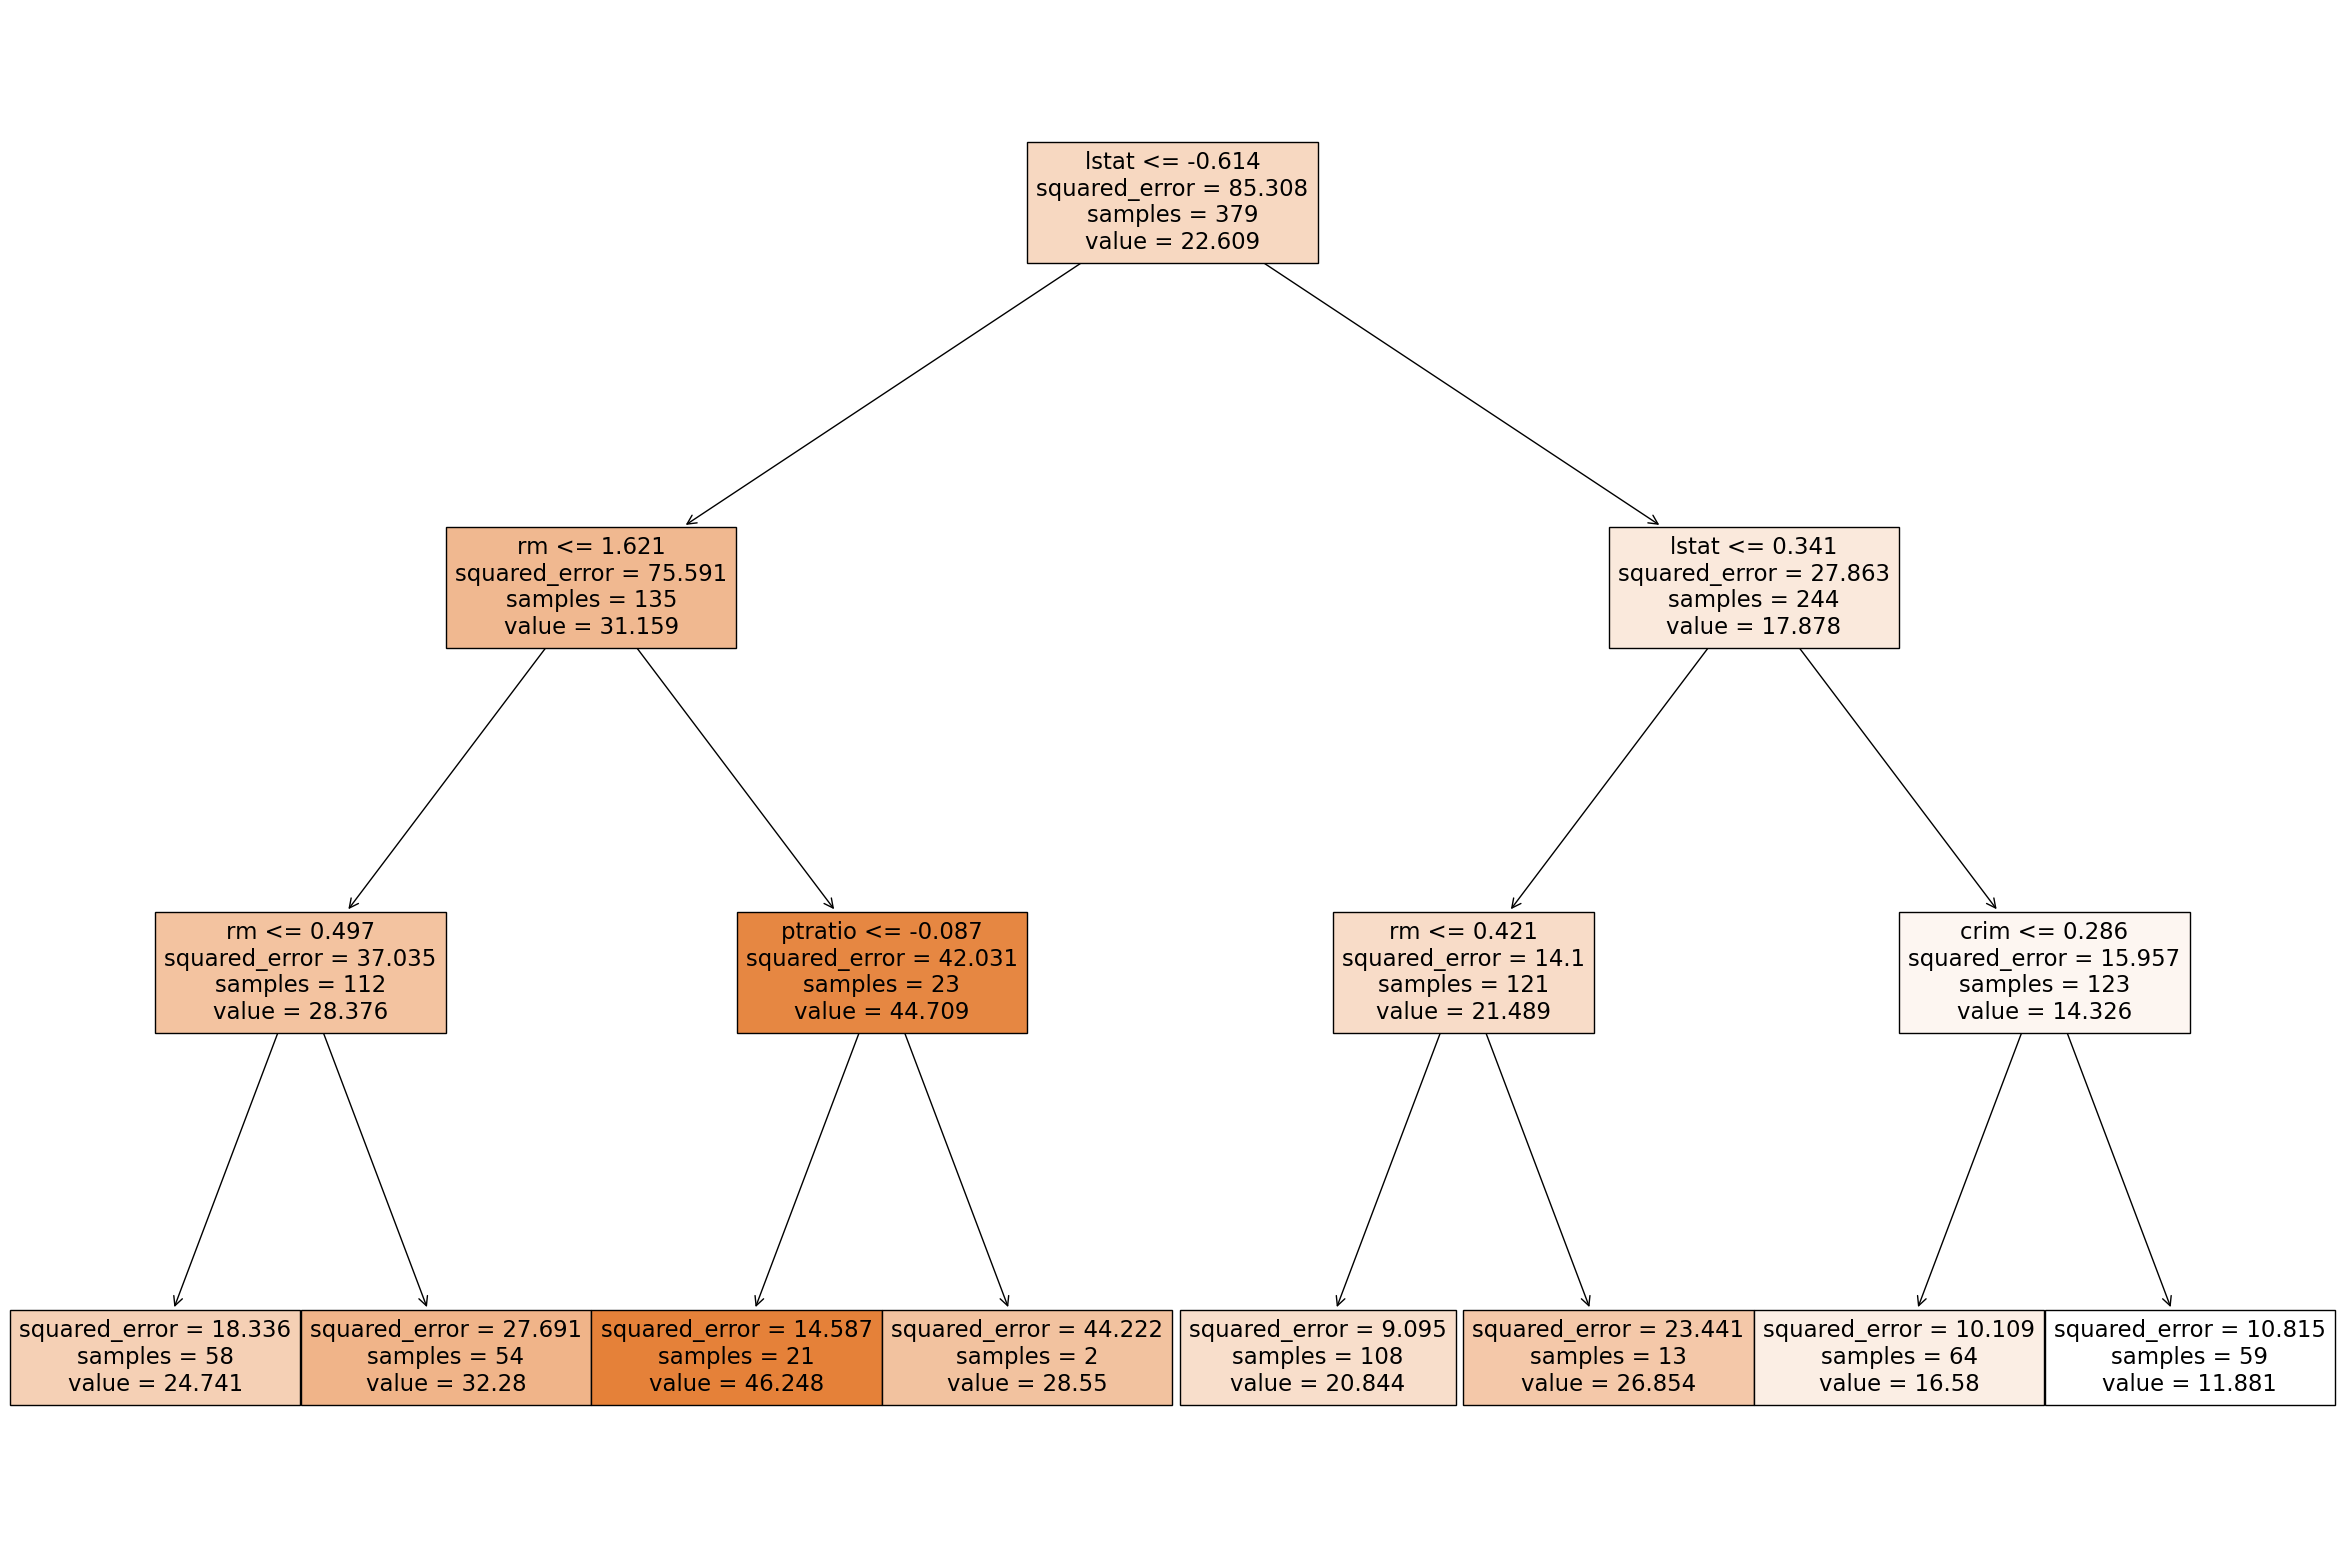

In [106]:
plt.figure(figsize=(30,20))
_ = tree.plot_tree(mod,feature_names = list(data.columns) ,filled = True)